# 

In [1]:
import pandas as pd
import numpy as np
import datetime #datetime, time, date

## index 생성

### datetime - date, time, datetime

In [2]:
date = datetime.date(year = 2013, month = 6, day = 7)
time = datetime.time(hour = 12, minute=30, second=19, microsecond=463198)
dt = datetime.datetime(year = 2013, month = 6, day = 7, hour = 12, minute=30, second=19, microsecond=463198)

In [3]:
date

datetime.date(2013, 6, 7)

In [4]:
time

datetime.time(12, 30, 19, 463198)

In [5]:
dt

datetime.datetime(2013, 6, 7, 12, 30, 19, 463198)

### datetime - timedelta

In [7]:
td = datetime.timedelta(weeks=2, days=3, hours=10, minutes=20, seconds=6.73, milliseconds=99, microseconds=8)

In [22]:
date + td
dt + td

datetime.date(2013, 6, 24)

datetime.datetime(2013, 6, 24, 22, 50, 26, 292206)

In [17]:
date-td

datetime.date(2013, 5, 21)

In [21]:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## data 생성

### pandas.timestamp

In [25]:
pd.Timestamp(year=2012, month=12, day=21,hour=5, minute=10, second=8, microsecond=99)

Timestamp('2012-12-21 05:10:08.000099')

In [26]:
pd.Timestamp('22/1/2018') # 앞 부분이 자동적으로 월이 될 수 없으면 자동적으로 일이 된다. 

Timestamp('2018-01-22 00:00:00')

In [27]:
pd.Timestamp('2014-5/10')

Timestamp('2014-05-10 00:00:00')

In [28]:
pd.Timestamp(500) 

Timestamp('1970-01-01 00:00:00.000000500')

In [29]:
pd.Timestamp(5000, unit='D')

Timestamp('1983-09-10 00:00:00')

### pandas.to_datetime

In [31]:
pd.to_datetime('2015-5-13')

Timestamp('2015-05-13 00:00:00')

In [32]:
pd.to_datetime(100, unit='D', origin='2013-1-1')

Timestamp('2013-04-11 00:00:00')

In [37]:
s = pd.Series([10,100,1000,10000]) # 기본값 1970-01-01에서 10일 뒤, 100일 뒤, 1000일 뒤, 10000일 뒤 
b = pd.to_datetime(s, unit='D')
b

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

### pandas.Series

In [40]:
s = pd.Series(['12-5-2015', '14-5-2013', '20/12/2017', '40/23/2017'])
pd.to_datetime(s, dayfirst=True, errors='coerce') # 변환할 때 에러를 어떻게 반응할 것인지 결정  - NAT; Not a Timestamp
pd.to_datetime(s, dayfirst=True, errors='ignore')

0   2015-05-12
1   2013-05-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

0     12-5-2015
1     14-5-2013
2    20/12/2017
3    40/23/2017
dtype: object

### pandas.timedelta

In [41]:
pd.Timedelta(days=5, minutes=7.34) # 기간 

Timedelta('5 days 00:07:20.400000')

In [43]:
pd.Timedelta(100, unit='W')

Timedelta('700 days 00:00:00')

In [46]:
pd.to_timedelta('5 dayz', errors='ignore')
pd.to_timedelta('5 dayz', errors='coerce')

'5 dayz'

NaT

In [47]:
s = pd.Series([10,100])
pd.to_timedelta(s, unit='s')

0   00:00:10
1   00:01:40
dtype: timedelta64[ns]

In [49]:
time_strings=['2 days 24 minutes 89.67 seconds', '00:45:23.6']
pd.to_timedelta(time_strings)

TimedeltaIndex(['2 days 00:25:29.670000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)

In [50]:
pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timedelta('24 days 10:06:00')

### pandas.to_timedelta

In [59]:
td1 = pd.to_timedelta([10,100], unit='s')
td2 = pd.to_timedelta(['3 hours', '4 hours'])
td1 + td2
type(td1)
type(td1 + td2) # timedelta + timedelta = timedelta

TimedeltaIndex(['03:00:10', '04:01:40'], dtype='timedelta64[ns]', freq=None)

pandas.core.indexes.timedeltas.TimedeltaIndex

pandas.core.indexes.timedeltas.TimedeltaIndex

In [60]:
ts = pd.Timestamp('2016-10-1 4:23:23.9')

In [65]:
ts.year, ts.month, ts.hour, ts.second

(2016, 10, 4, 23)

In [66]:
ts.ceil('h') # 올림 

Timestamp('2016-10-01 05:00:00')

In [67]:
ts.dayofweek, ts.dayofyear, ts.daysinmonth

(5, 275, 31)

In [68]:
ts.to_pydatetime()

datetime.datetime(2016, 10, 1, 4, 23, 23, 900000)

In [70]:
td = pd.Timedelta(125.8773, unit='h')
td

Timedelta('5 days 05:52:38.280000')

In [71]:
td.round('min')

Timedelta('5 days 05:53:00')

In [72]:
td.components

Components(days=5, hours=5, minutes=52, seconds=38, milliseconds=280, microseconds=0, nanoseconds=0)

# 추가 사항

# pandas
1. timestamp 
    - pd.to_datetime
        - 인자 하나: timestamp
        - list: 인덱스
    - pd.to_timedelta
        - 인자 하나: timestamp
        - list: 인덱스
2. timedelta

In [105]:
a = '2018-07-30'
type(pd.to_datetime('2018-7-30'))
type(pd.to_datetime(['2018-7-30', '2018-7-31']))
type(pd.Timestamp('2018-7-30'))

pandas._libs.tslibs.timestamps.Timestamp

pandas.core.indexes.datetimes.DatetimeIndex

pandas._libs.tslibs.timestamps.Timestamp

In [104]:
type(pd.to_timedelta('7 hours'))
type(pd.to_timedelta(['7 hours', '8 hours']))
type(pd.Timedelta('7 hours'))

pandas._libs.tslibs.timedeltas.Timedelta

pandas.core.indexes.timedeltas.TimedeltaIndex

pandas._libs.tslibs.timedeltas.Timedelta

In [91]:
crime=pd.read_hdf('crime.h5','crime')

In [92]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [93]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460911 entries, 0 to 460910
Data columns (total 8 columns):
OFFENSE_TYPE_ID        460911 non-null category
OFFENSE_CATEGORY_ID    460911 non-null category
REPORTED_DATE          460911 non-null datetime64[ns]
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null category
IS_CRIME               460911 non-null int64
IS_TRAFFIC             460911 non-null int64
dtypes: category(3), datetime64[ns](1), float64(2), int64(2)
memory usage: 22.9 MB


In [109]:
crime.describe(include='all')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
count,460911,460911,460911,457296.000000,457296.000000,460911,460911.000000,460911.000000
unique,196,15,390969,NaN,NaN,78,NaN,NaN
top,traffic-accident,traffic-accident,2017-02-13 09:00:00,NaN,NaN,five-points,NaN,NaN
freq,87420,125060,9,NaN,NaN,23466,NaN,NaN
first,NaN,NaN,2012-01-02 00:06:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-09-29 06:16:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-104.949973,39.726061,NaN,0.728668,0.271855
std,NaN,NaN,NaN,1.243537,0.471636,NaN,0.444648,0.444916
min,NaN,NaN,NaN,-105.300593,0.000001,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,-105.009524,39.706890,NaN,0.000000,0.000000


In [113]:
crime.REPORTED_DATE.dt.weekday_name # 요일별 범죄 확인 

0            Sunday
1            Sunday
2            Sunday
3            Sunday
4            Sunday
5            Sunday
6            Sunday
7            Sunday
8            Monday
9            Sunday
10           Sunday
11           Monday
12         Thursday
13           Monday
14          Tuesday
15          Tuesday
16        Wednesday
17           Monday
18           Monday
19           Friday
20         Saturday
21         Saturday
22         Thursday
23           Monday
24        Wednesday
25        Wednesday
26          Tuesday
27        Wednesday
28        Wednesday
29        Wednesday
            ...    
460881      Tuesday
460882      Tuesday
460883      Tuesday
460884      Tuesday
460885      Tuesday
460886      Tuesday
460887      Tuesday
460888      Tuesday
460889    Wednesday
460890      Tuesday
460891      Tuesday
460892      Tuesday
460893      Tuesday
460894      Tuesday
460895      Tuesday
460896      Tuesday
460897       Friday
460898     Saturday
460899      Tuesday


In [114]:
crime=crime.set_index('REPORTED_DATE')

In [119]:
crime.sort_index(ascending=True, inplace=True)

In [121]:
crime['2012']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [127]:
a = crime['2012-1-1':'2012-1-3']['IS_CRIME'].value_counts()[0]
b = crime['2012-1-1':'2012-1-3']['IS_CRIME'].value_counts()[0]
a /(a+b)

0.5

In [128]:
len(crime.loc['2016-05-12'])

243

In [133]:
crime['2015-12'].groupby('OFFENSE_TYPE_ID').sum()

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
OFFENSE_TYPE_ID,,,,
accessory-conspiracy-to-crime,-314.899555,119.143597,3,0
agg-aslt-police-weapon,-734.785459,278.034252,7,0
aggravated-assault,-6613.832241,2503.426871,63,0
aggravated-assault-dv,-2308.541088,874.317434,22,0
altering-vin-number,0.000000,0.000000,0,0
animal-cruelty-to,-314.750875,119.182268,3,0
animal-poss-of-dangerous,0.000000,0.000000,0,0
arson-business,-105.018577,39.758164,1,0
arson-other,-105.027200,39.720542,1,0


In [137]:
crime.between_time('2:00', '5:00', include_end=False)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0
2012-01-03 04:18:00,burglary-business-by-force,burglary,-104.941613,39.783624,elyria-swansea,1,0
2012-01-04 02:08:00,vehicular-eluding,all-other-crimes,-104.987485,39.739897,civic-center,1,0
2012-01-04 02:08:00,traffic-accident-dui-duid,traffic-accident,-104.987485,39.739897,civic-center,0,1
2012-01-04 02:09:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.957280,39.698563,belcaro,1,0
2012-01-04 02:10:00,vehicular-eluding-no-chase,all-other-crimes,-105.028386,39.753627,sloan-lake,1,0


In [136]:
crime.at_time('5:47')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-15 05:47:00,burglary-business-by-force,burglary,-104.967844,39.678296,university,1,0
2012-05-26 05:47:00,assault-simple,other-crimes-against-persons,-104.991880,39.753646,five-points,1,0
2012-06-10 05:47:00,aggravated-assault,aggravated-assault,-105.020598,39.676478,college-view-south-platte,1,0
2012-07-04 05:47:00,sex-aslt-rape,sexual-assault,NaN,NaN,west-highland,1,0
2012-07-09 05:47:00,theft-of-motor-vehicle,auto-theft,-105.030215,39.708802,westwood,1,0
2012-07-20 05:47:00,arson-residence,arson,-104.951667,39.761577,skyland,1,0
2012-07-21 05:47:00,drug-methampetamine-possess,drug-alcohol,-105.013471,39.710309,athmar-park,1,0
2012-07-21 05:47:00,weapon-by-prev-offender-powpo,all-other-crimes,-105.013471,39.710309,athmar-park,1,0
2012-08-16 05:47:00,theft-of-motor-vehicle,auto-theft,-105.027683,39.692636,mar-lee,1,0


In [138]:
crime.resample('W')

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [141]:
weekly_crimes = crime.resample('W').size() # D :일별로, Y: 년도별로  - 날짜별로 그룹핑
weekly_crimes.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [143]:
len(crime[:'2012-1-8'])

877

AxesSubplot(0.125,0.125;0.775x0.755)


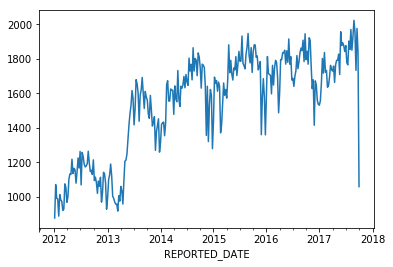

In [147]:
print(weekly_crimes.plot.line())